# **Project Name**    - Netflix Movies and TV Shows Clustering

##### **Name -** Shubham Sharma

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to exlore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

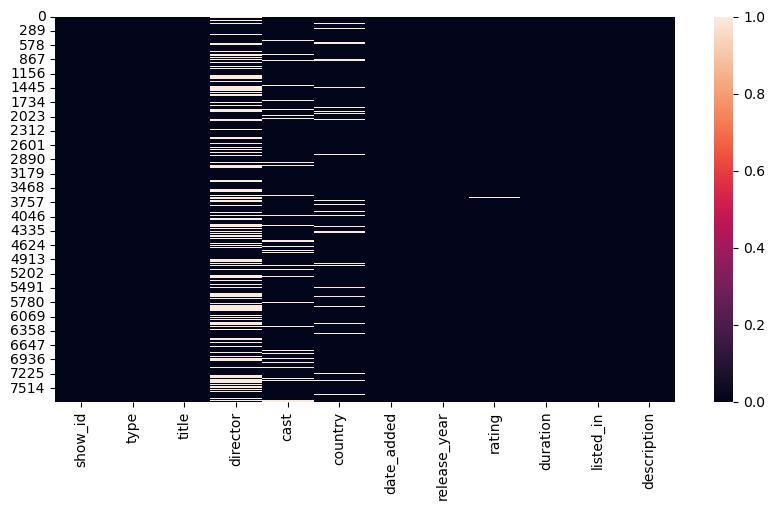

In [8]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=True)

In [9]:
# Handling Null Values:- 
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['country'] = df['country'].fillna(0)
df['cast'].fillna(value='No Cast', inplace=True)
df['date_added'].fillna(value=0,inplace=True)
df['director'].fillna(value='N/A',inplace=True)

/tmp/ipykernel_9638/4158391501.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna(value='No Cast', inplace=True)
/tmp/ipykernel_9638/4158391501.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [10]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,7787,7787,7787,7787,7787.000000,7787,7787,7787,7787
unique,7787,2,7787,4050,6832,682,1566,NaN,14,216,492,7769
top,s1,Movie,3%,N/A,No Cast,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2389,718,2555,118,NaN,2870,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

Attribute Information
1. show_id: Unique ID For every Movie/ Tv Show
2. type: Identifier- A movie or TV Show
3. title: Title of the Movie or TV Show
4. director: Director of the Movie
5. cast: Actors involved in the movie or the Tv Show
6. country: Country where the movie / show was produced
7. date_added: Date it was added on Netflix
8. release_year: Actual Releaseyear of the movie / show
9. rating: TV Rating of the movie / show
10. Duration: Total Duration - in minutes or number of seasons
11. Listed_in: Genere
12. Description:_ The summary description

### Check Unique Values for each variable.

In [12]:
# Check count of Unique Values for each variable.
print(df.apply(lambda col:col.value_counts().unique()))

show_id                                                       [1]
type                                                 [5377, 2410]
title                                                         [1]
director        [2389, 18, 16, 14, 13, 12, 10, 9, 8, 7, 6, 5, ...
cast                           [718, 18, 10, 7, 6, 5, 4, 3, 2, 1]
country         [2555, 923, 507, 397, 226, 183, 177, 134, 115,...
date_added      [118, 94, 76, 72, 63, 61, 58, 53, 51, 49, 46, ...
release_year    [1121, 1012, 996, 882, 868, 541, 334, 267, 219...
rating          [2870, 1931, 806, 665, 386, 280, 271, 247, 194...
duration        [1608, 382, 184, 136, 131, 125, 119, 118, 117,...
listed_in       [334, 321, 320, 243, 215, 205, 177, 172, 169, ...
description                                             [3, 2, 1]
dtype: object


In [14]:
# Write your code to make your dataset analysis ready.
# Create new features to score date,day,month and year seperately
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

We can gather the following insights from the dataset:
since we have fill the missing values above and convert the object format of date_added to date_time format our dataset is ready for next step.

###  Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

#### Chart - 1 Finding which content(movie or TV Shows) are most watched on Netflix ?

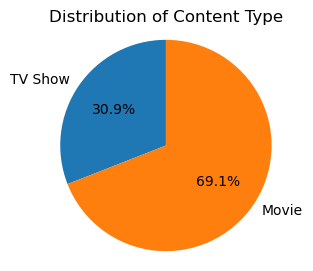

In [15]:
import matplotlib.pyplot as plt

labels = ['TV Show', 'Movie']
values = [df['type'].value_counts()['TV Show'], df['type'].value_counts()['Movie']]

plt.figure(figsize=(3, 3))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Content Type')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart is used in the code is a pie chart. I picked this chart becuase it is effective in visualizing the distribution of categorical data. In this case, the chart is used to represent the types of content watched on Netflix, which are categorized as "TV Show" and "Movie".

##### 2. What is/are the insight(s) found from the chart?

Movies constitute the majority, accounting for 69.1% of the content watched on Netflix, while TV Shows make up a smaller percentage of 30.9%

#### Chart - 2 Number of TV Shows and Movies added to Netflix per month

<Axes: xlabel='month_added', ylabel='count'>

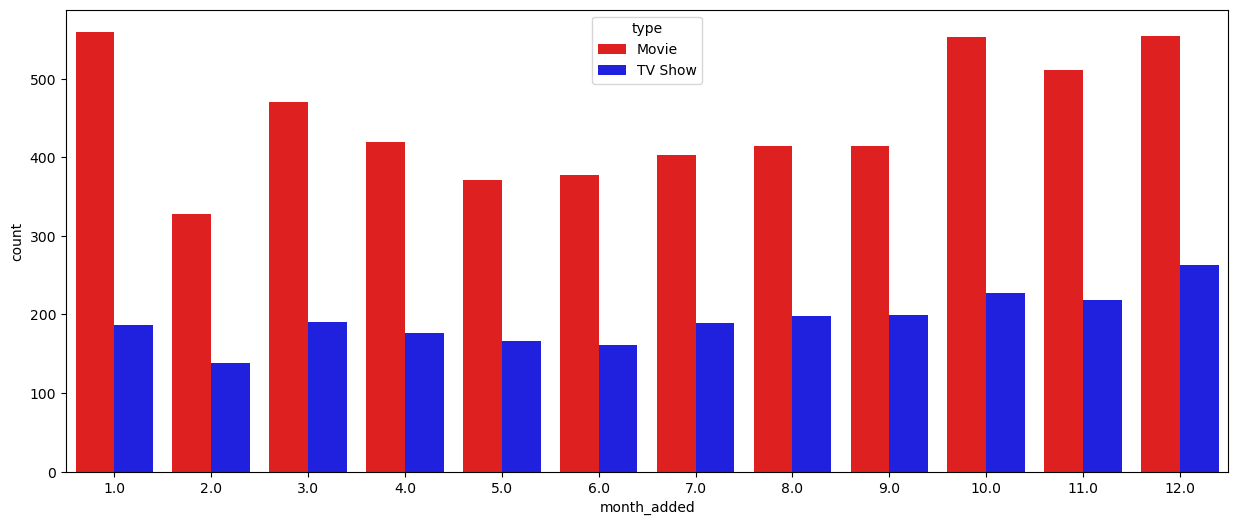

In [16]:
# Chart - 2 visualization code
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month_added',hue='type',lw=5, data=df, ax=ax,palette=['red','blue'])

##### 1. Why did you pick the specific chart?

I picked the specific chart becuase it shows the number of Tv shows and movies added to Netflix per month. This is a relevant chart to look at for Netflix, as it can help them to understand how thier contebt library is growing over time.

#### Chart - 3 Distribution of movie and TV Shows runtimes on Netflix

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_9638/2124391039.py:3: SyntaxWarning: invalid escape sequence '\d'
  movie['duration_num'] = movie['duration'].str.extract('(\d+)').astype(float)
/tmp/ipykernel_9638/2124391039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration_num'] = movie['duration'].str.extract('(\d+)').astype(float)


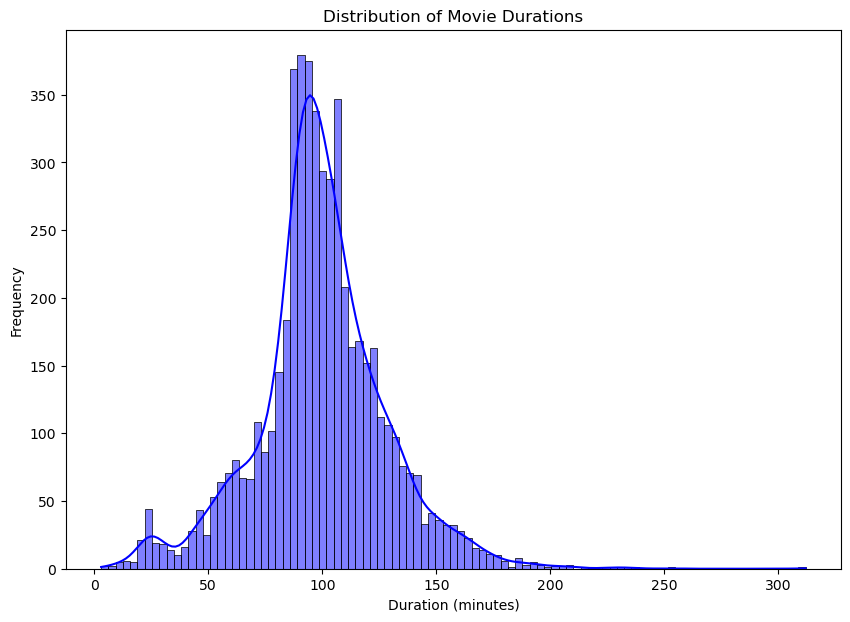

In [17]:
# Chart - 3 visualization code
movie = df[df['type'] == 'Movie']
movie['duration_num'] = movie['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 7))
sns.histplot(movie['duration_num'], kde=True, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

I picked the distplot chart because it shows the distribution of movie and TV show runtimes on Netflix. This chart is relevant to analyze because it can help us to understand the types of content that users are interested in and how Netflix's content library compares to the industry standard.

##### 2. What is/are the insight(s) found from the chart?

- The distribution of movie and TV show runtimes on Netflix is bimodal, with two peaks at around 90 minutes and 2 hours
- This suggests that Netfix users are interested in both shorter and longer content

#### Chart - 4 Distribution of Tv Shows Duration


<Axes: title={'center': 'Disribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

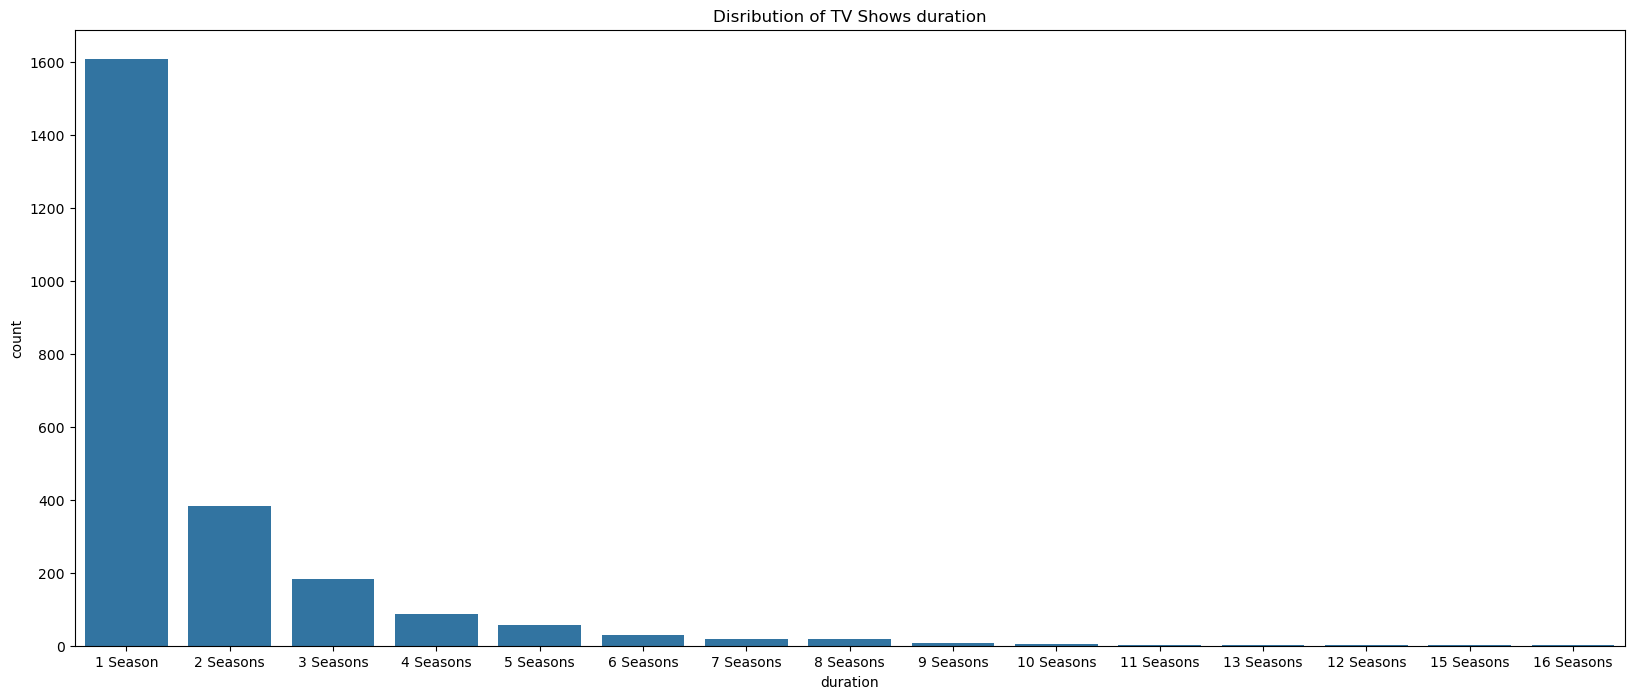

In [18]:
# Chart - 4 visualization code
tv_show = df[df['type'] == 'TV Show']
plt.figure(figsize=(20,8))
plt.title("Disribution of TV Shows duration")
sns.countplot(x=tv_show['duration'],data=tv_show,order = tv_show['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

The chart in question is a countplot, which is a type of bar chart that shows the frequency or cout of each category in a categorical variable. It seems to be used to display the distribution of TV show seasons

##### 2. What is/are the insight(s) found from the chart?

From the chart, we observed that the majority of TV shows or web series in the dataset have only one season, while the remaining shows have a maximum of two,three,four, or five seasons

#### Chart - 5 find the number of TV Shows or movies an actors has appeared in

In [19]:
# Chart - 5 visualization code
df['cast']

cast = df['cast'].str.split(', ', expand=True).stack()

cast = cast[cast != 'No Cast']
# top actors 
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Name: count, Length: 32881, dtype: int64

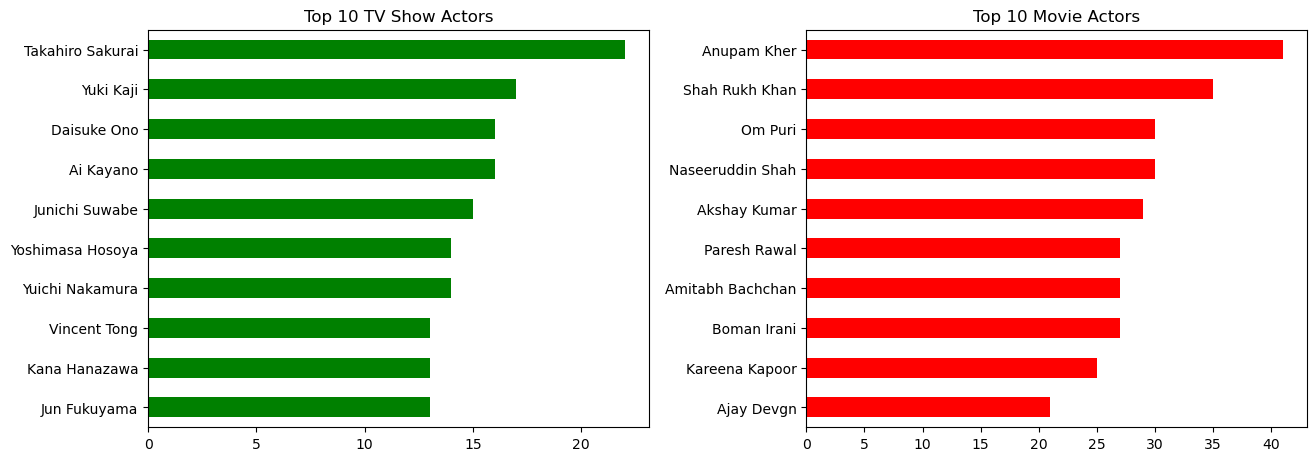

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# TV Shows - extract actors
top_TVshows_actor = df[df['type'] == 'TV Show']['cast'].dropna().str.split(', ', expand=True).stack()
top_TVshows_actor = top_TVshows_actor[top_TVshows_actor != 'No Cast']

# Top 10 actors in TV Shows
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0], color='green')
a.set_title('Top 10 TV Show Actors', size=12)
a.invert_yaxis()

# Movies - extract actors
top_movie_actor = df[df['type'] == 'Movie']['cast'].dropna().str.split(', ', expand=True).stack()
top_movie_actor = top_movie_actor[top_movie_actor != 'No Cast']

# Top 10 actors in Movies
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1], color='red')
b.set_title('Top 10 Movie Actors', size=12)
b.invert_yaxis()

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


#### Chart - 6 - Correlation Heatmap

In [21]:
# Correlation Heatmap visualization code
ratings = {
    'TV-PG':'Older Kids',
    'TV-MA':'Adults',
    'TV-Y7-FV':'Older Kids',
    'TV-Y7':'Older Kids',
    'TV-14':'Teens',
    'R':'Adults',
    'TV-Y':'Kids',
    'NR':'Adults',
    'PG-13':'Teens',
    'TV-G':'Kids',
    'PG':'Older Kids',
    'G':'Kids',
    'UR':'Adults',
    'NC-17':'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [22]:
# Add a count column
df['count'] = 1

# Group by country and sum count
data = df.groupby('country')[['count']].sum().sort_values(by='count', ascending=False).reset_index().head(10)
top_countries = data['country']

# Filter original DataFrame for those top 10 countries
df_heatmap = df[df['country'].isin(top_countries)]

# Create a normalized crosstab (for heatmap data)
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['target_ages'], normalize="index").T
df_heatmap


country,0,Canada,Egypt,France,India,Japan,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Adults,0.319527,0.446328,0.277228,0.678261,0.255688,0.367257,0.469945,0.835821,0.513854,0.502544
Kids,0.171598,0.180791,0.000000,0.095652,0.016251,0.008850,0.027322,0.022388,0.093199,0.073190
Older Kids,0.234714,0.225989,0.039604,0.060870,0.160347,0.269912,0.120219,0.044776,0.204030,0.187476
Teens,0.274162,0.146893,0.683168,0.165217,0.567714,0.353982,0.382514,0.097015,0.188917,0.236791


In [23]:
df['country'].value_counts()

country
United States                                                   2555
India                                                            923
0                                                                507
United Kingdom                                                   397
Japan                                                            226
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 682, dtype: int64

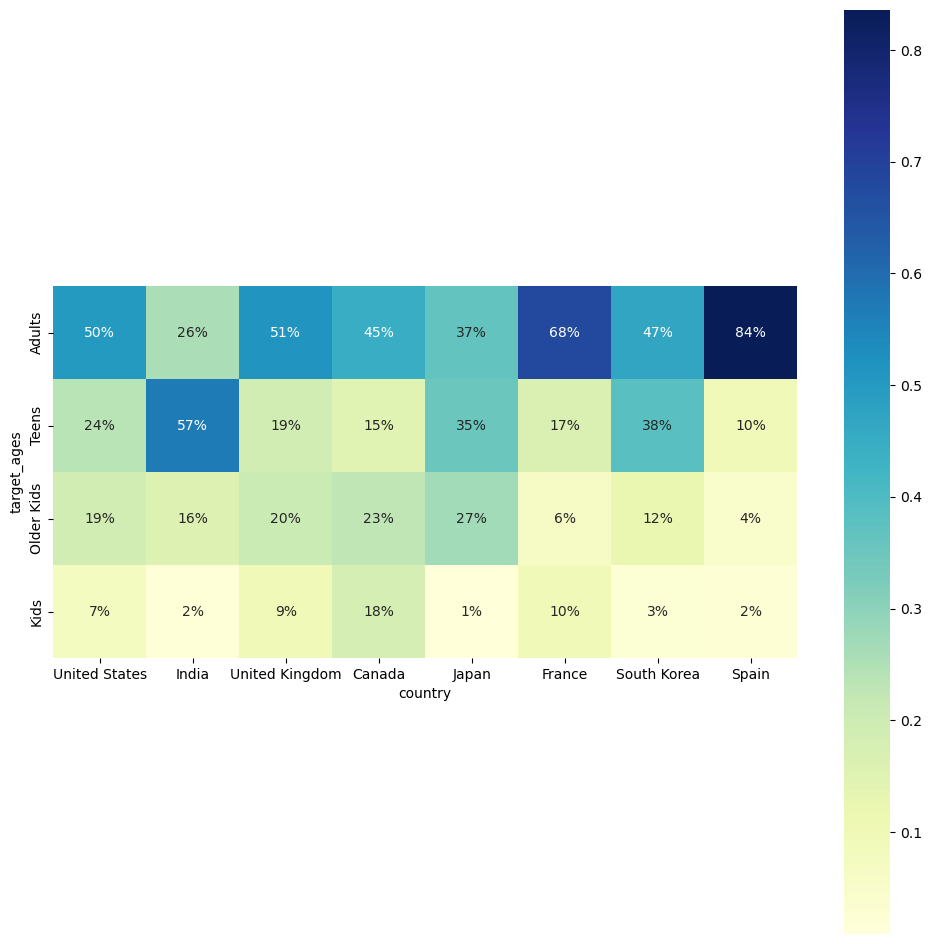

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order_2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order_2], cmap='YlGnBu', square=True,annot=True,cbar=True,fmt='1.0%')
plt.show()


##### 1. Why did you pick the specific chart?

The heatmap is a suitable choice for this scenario becayse it allows me to represent the data using color encoding. The color intensity represents the frequency or proportion of movie genres within each age group.

##### 2. What is/are the insight(s) found from the chart?

The genre with highest target audience of 84% adults is stand-up comedy childrem & Family Movies, Comedies also have a significant target audience with 82%. Primarily catering to older kids, adults, Kds & TV Shows have a target audience of around 68% to 57%

#### Chart - 7 - Pair Plot

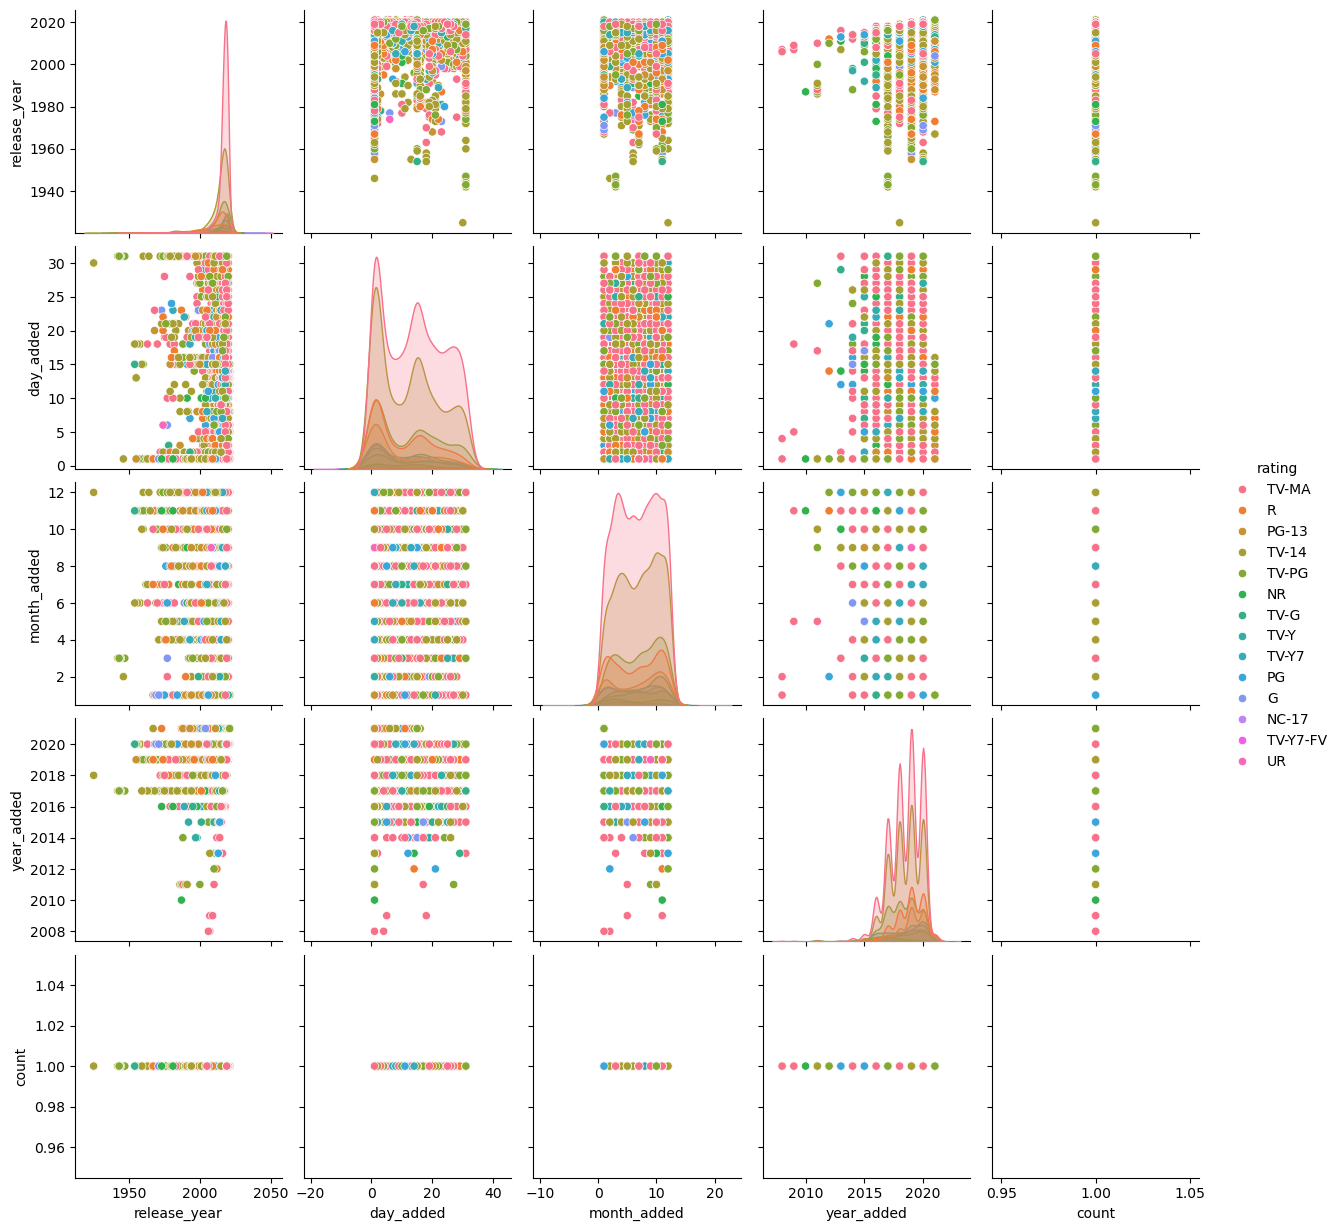

In [25]:
# Pair Plot visualization code
sns.pairplot(df,hue='rating')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      7787 non-null   object        
 4   cast          7787 non-null   object        
 5   country       7787 non-null   object        
 6   date_added    7689 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7787 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
 12  day_added     7689 non-null   float64       
 13  month_added   7689 non-null   float64       
 14  year_added    7689 non-null   float64       
 15  target_ages   7787 non-null   object  

In [66]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,target_ages,count
0,s1,TV Show,3%,N/A,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,8.0,2020.0,Adults,1


In [75]:
#calculating number of unique values in each column
df.nunique()

show_id         7787
type               2
title           7787
director        4050
cast            6832
country          682
date_added      1497
release_year      73
rating            14
duration         213
listed_in        492
description     7769
day_added         31
month_added       12
year_added        14
target_ages        4
count              1
dtype: int64

In [ ]:
#converting the rating column to numerical values
ratings = {
    'TV-PG':1,
    'TV-MA':2,
    'TV-Y7-FV':3,
    'TV-Y7':4,
    'TV-14':5,
    'R':6,
    'TV-Y':7,
    'NR':8,
    'PG-13':9,
    'TV-G':10,
    'PG':11,
    'G':12,
    'UR':13,
    'NC-17':14
}
df['rating'] = df['rating'].replace(ratings)


/tmp/ipykernel_9638/2832694630.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rating'] = df['rating'].replace(ratings)
/tmp/ipykernel_9638/2832694630.py:18: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['rating'] = df['rating'].replace(ratings)


In [69]:
# Convert categorical variables to numerical
df['type'] = df['type'].astype('category').cat.codes

In [71]:
# converting country to numerical
df['country'] = df['country'].astype('category').cat.codes

In [72]:
# Converting duration to minutes
def convert_duration(duration):
    if 'Season' in duration:
        return int(duration.split(' ')[0]) * 60
    else:
        return int(duration.split(' ')[0])
df['duration'] = df['duration'].apply(convert_duration)

In [73]:
# target_ages to numerical
df['target_ages'] = df['target_ages'].astype('category').cat.codes

In [78]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,target_ages,count
0,s1,1,3%,N/A,"João Miguel, Bianca Comparato, Michel Gomes, R...",40,2020-08-14,2020,2,240,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,8.0,2020.0,0,1


In [84]:
# print objects
df.select_dtypes(include=['object']).columns

Index(['show_id', 'title', 'director', 'cast', 'listed_in', 'description'], dtype='object')

In [85]:
# Split the dataset into features and target variable
X = df.drop(['show_id', 'title', 'date_added', 'day_added', 'month_added', 'year_added','director','cast','listed_in','description','rating'], axis=1)
y = df['rating']
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ML Model - 1

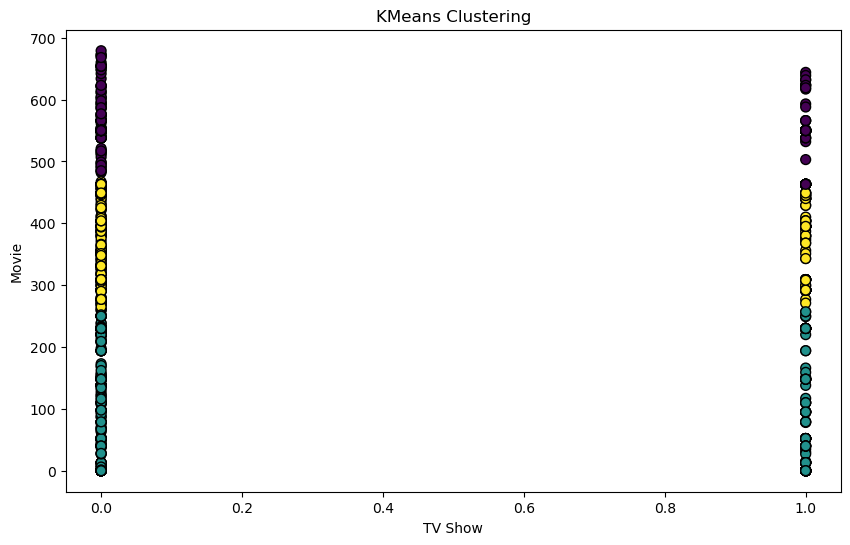

In [91]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
# Create the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit the model to the training data
kmeans.fit(X_train)
# Predict the cluster labels for the test data
y_pred = kmeans.predict(X_test)
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('KMeans Clustering')
plt.xlabel('TV Show')
plt.ylabel('Movie')
plt.show()

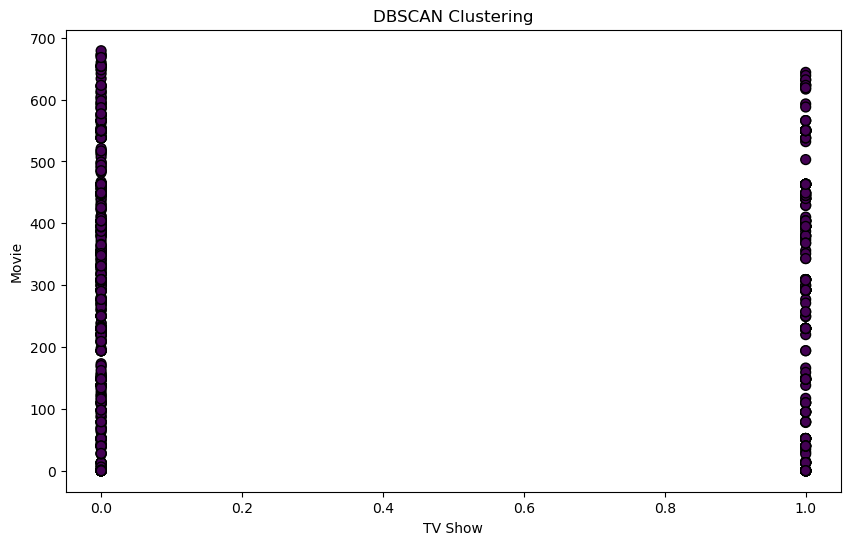

In [92]:
# ML Model - 2 Implementation
from sklearn.cluster import DBSCAN
# Create the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
# Fit the model to the training data
dbscan.fit(X_train)
# Predict the cluster labels for the test data
y_pred_dbscan = dbscan.fit_predict(X_test)
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_dbscan, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('TV Show')
plt.ylabel('Movie')
plt.show()

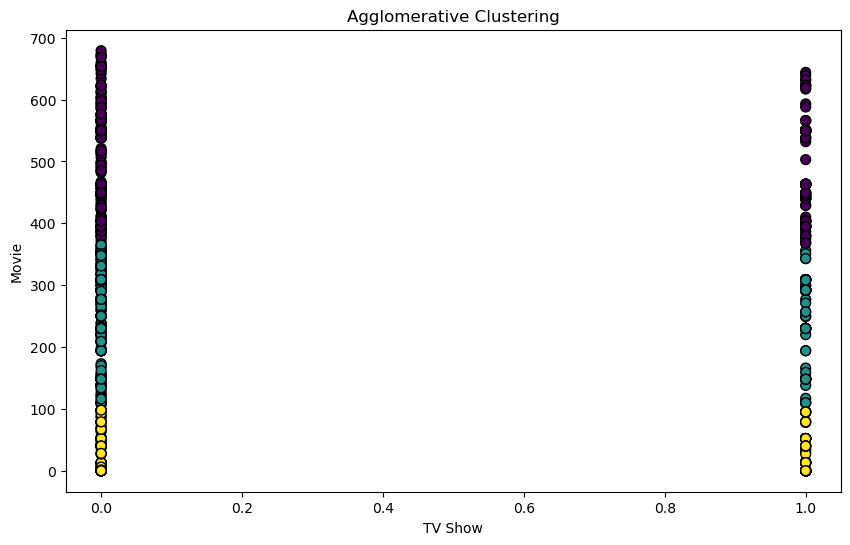

In [93]:
# ML Model - 3 Implementation
from sklearn.cluster import AgglomerativeClustering
# Create the AgglomerativeClustering model
agglo = AgglomerativeClustering(n_clusters=3)
# Fit the model to the training data
agglo.fit(X_train)
# Predict the cluster labels for the test data
y_pred_agglo = agglo.fit_predict(X_test)
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_agglo, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('TV Show')
plt.ylabel('Movie')
plt.show()

In [94]:
# Calculate Score
from sklearn.metrics import silhouette_score
# Calculate silhouette score for KMeans
kmeans_score = silhouette_score(X_test, y_pred)
print(f'Silhouette Score for KMeans: {kmeans_score:.2f}')
# Calculate silhouette score for DBSCAN
dbscan_score = silhouette_score(X_test, y_pred_dbscan)
print(f'Silhouette Score for DBSCAN: {dbscan_score:.2f}')
# Calculate silhouette score for AgglomerativeClustering
agglo_score = silhouette_score(X_test, y_pred_agglo)
print(f'Silhouette Score for AgglomerativeClustering: {agglo_score:.2f}')

Silhouette Score for KMeans: 0.52
Silhouette Score for DBSCAN: -0.43
Silhouette Score for AgglomerativeClustering: 0.61
